In [ ]:
#Import some things
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord


In [ ]:
# Age option 1 TESS data Theodoridis et al. 2025
#Reading in the table, making sure all the tables have a column named Age in Gyr
# and that every star in the table has an Age
tessraw = Table.read("Theodoridis2025.csv", format="ascii")
#this one has an age column in Gyr already so we're just going to rename it Age
tessraw['Final_age'].name='Age'
hasagetess=np.where((tessraw['Age']==tessraw['Age']) & (tessraw['Age']>0.1) &(tessraw['Flag']==0))
tess=tessraw[hasagetess]
tess

TIC,Star_type,Age,νmax,Radius_gaia,Teff_xgboost,M_H_xgboost,Logg_xgboost,Logg_seis,E_Logg_seis,Mass_seis,E_Mass_seis,Initial_mass,Teff_rgb,Teff_rc,Median_age_rgb,Median_age_rc,E_lower_age_rgb,E_upper_age_rgb,E_lower_age_rc,E_upper_age_rc,Teff_diff,Flag
int64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
347020604,Clump,4.933697638292032,32.2,10.8,4766.6,-0.161,2.432,2.4173752480453827,0.0366707608673319,1.1120077414967078,0.0588614326241161,1.2303580537284051,4573.560449427352,4592.554431111989,7.362373244,4.928036510093708,6.081092717,8.892029592,4.299934128259921,6.1356166056543815,174.04556888801108,0
365250045,RGB,5.919390103924665,33.0,10.8,4931.7,-0.342,2.455,2.4229857865111493,0.0357953759646522,1.126466677413624,0.056320640605,1.1264672739859862,4667.980210870163,4834.105313542321,5.948811656,4.27541564590489,5.120775603,7.010332121,3.7125897559954217,4.990341868284544,97.59468645767902,0
377058143,RGB,10.659761236332615,59.1,7.3,4732.1,-0.519,2.615,2.677206425366256,0.0648094481080465,0.9241388003056158,0.0471439463924816,0.9241384053448526,4809.243666602538,4845.904744096898,11.11556225,5.653288060595535,9.53022434,12.72313934,4.950738403099905,6.798479977799735,-113.8047440968976,0
347548024,RGB,4.2433496208314345,33.2,11.5,4634.4,-0.213,2.388,2.4218043131513705,0.0720751969086103,1.2737524436569616,0.0852469599851652,1.2737527853903323,4625.72134164397,4775.614677688445,4.196919598,3.1842561951173276,3.279495422,5.737266629,2.7003724708906987,3.926199760609352,-141.2146776884456,0
328321210,Clump,5.297976079237009,35.7,9.6,4982.0,-0.526,2.441,2.4671643779400427,0.0755464565388593,0.9853531626679212,0.0677079590734425,1.121116190405825,4737.2709053692715,4762.055765851048,9.131354832,5.481214180765681,6.619391066,11.17929356,4.57496878200937,6.826530999798273,219.9442341489521,0
328321103,RGB,3.76901613056093,34.5,11.4,4765.0,-0.277,2.533,2.438719284222579,0.0355087401732596,1.3014095644450476,0.0659512559797257,1.301409615256684,4669.883118807332,4814.012809659391,3.7183394,2.964010779639734,3.222621332,4.398228001,2.51085645776994,3.520642797490074,-49.01280965939077,0
328324062,Clump,2.303632505100647,41.3,11.3,4792.0,0.085,2.617,2.5205598637381987,0.0266418863144747,1.5438382675435354,0.0669944467135548,1.6114631436790468,4552.67752843955,4567.434071459611,2.700422808,2.2357112051063632,2.255954628,3.155200636,1.9961451072036724,2.638300639580447,224.565928540389,0
328400618,Clump,2.159728298323744,44.1,10.5,4910.2,-0.319,2.472,2.557435937807216,0.0739867137774788,1.4511074516675977,0.0926043469167527,1.5165343396975142,4767.690838544538,4778.114861413547,2.561181642,2.157582282377099,2.082416797,3.109146383,1.7850147949917456,2.6517500725099072,132.08513858645256,0
328255103,Clump,6.418514994888695,31.9,10.8,4686.6,0.019,2.433,2.406553604071016,0.0559847430029249,1.0846413740056715,0.0674371343640133,1.18744043140101,4471.252872082005,4487.596554271885,9.075683921,6.586728636664553,7.526636104,11.69375071,5.35273124007062,7.587960124712628,199.00344572811537,0


In [ ]:
# Age option 2 APOKASC-2 Pinsonneault et al. 2018
#Reading in the table, making sure all the tables have a column named Age in Gyr
# and that every star in the table has an Age
apokasc2raw = Table.read("Pinsonneault2018.txt", format="ascii.cds")
apokasc2raw['Age']=(10**np.array(apokasc2raw['LogAge'])/1000.) #Age was in log(Myr) so needs converting
hasagea2=np.where((apokasc2raw['Age']==apokasc2raw['Age']) & (apokasc2raw['Age']>0.1))
apokasc2=apokasc2raw[hasagea2]
apokasc2

KIC,2MASS,Teff,e_Teff,FeH,e_FeH,AFe,e_AFe,Nmax,e_Nmax,Dnu,e_Dnu,ES,Fdnu,e_Fdnu,M(cor),e_M(cor)-ran,e_M(cor)-sys,R(cor),e_R(cor)-ran,e_R(cor)-sys,logg(seis),e_logg(seis)-ran,e_logg(seis)-sys,Rho,e_Rho-ran,e_Rho-sys,LogAge,E_LogAge,e_LogAge,Av,e_Av,Notes,Age
,,K,K,dex(---),dex(---),dex(---),dex(---),uHz,,uHz,,,,,solMass,,,Rsun,,,dex(cm / s2),,,g / cm3,,,Myr,Myr,Myr,mag,mag,,
int64,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str18,float64
1027110,2M19250937+3644599,4177.6,51.8,-0.232,0.025,0.205,0.015,6.496,0.015,1.132,0.029,RGB,1.0458,0.0006,0.985,0.126,0.044,23.412,0.06,0.017,1.692,0.007,0.007,0.0001082,0.058,0.008,4.002,0.205,-0.189,0.269,0.121,SeisUnc,10.046157902783946
1027337,2M19252021+3647118,4636.0,67.3,0.275,0.024,0.023,0.01,73.975,0.009,6.991,0.013,RGB,1.0333,0.0003,1.227,0.063,0.038,7.544,0.029,0.014,2.772,0.005,0.007,0.004029,0.026,0.007,3.798,0.099,-0.09,0.214,0.071,...,6.2805835881331795
1160789,2M19233280+3652207,4729.6,72.3,-0.257,0.034,0.188,0.015,25.209,0.015,3.545,0.011,RC,0.9965,0.0324,0.875,0.147,0.082,10.86,0.071,0.025,2.308,0.007,0.01,0.0009635,0.069,0.008,3.889,0.133,-0.146,0.009,0.074,...,7.744617978025183
1161447,2M19241746+3651460,4776.1,86.2,0.058,0.029,-0.006,0.013,37.066,0.027,4.153,0.011,RC,1.003,0.0238,1.46,0.135,0.076,11.54,0.059,0.022,2.478,0.012,0.01,0.00134,0.052,0.008,3.396,0.166,-0.145,0.4,0.086,...,2.48885731828239
1161618,2M19242614+3648478,4742.0,72.1,0.064,0.029,0.005,0.012,33.926,0.01,4.093,0.012,RC,1.001,0.0033,1.183,0.063,0.077,10.879,0.028,0.023,2.438,0.005,0.01,0.001296,0.026,0.008,3.639,0.064,-0.069,0.199,0.074,...,4.355118736855684
1162220,2M19245791+3653298,4190.1,51.7,0.083,0.021,0.07,0.011,11.0,0.01,1.669,0.011,RGB,1.0484,0.0004,1.007,0.055,0.044,18.175,0.024,0.017,1.922,0.005,0.007,0.0002364,0.021,0.008,4.056,0.087,-0.083,0.181,0.073,...,11.37627285823431
1162746,2M19252639+3649116,4798.1,75.6,-0.388,0.038,0.229,0.017,27.798,0.015,3.763,0.01,RC,0.9972,0.0281,0.941,0.131,0.08,10.688,0.062,0.024,2.354,0.007,0.01,0.001087,0.06,0.008,3.786,0.139,-0.131,0.172,0.075,...,6.109420249055721
1163114,2M19254564+3650475,4285.8,54.4,0.297,0.02,0.025,0.01,14.356,0.011,1.887,0.008,RGB,1.0396,0.0004,1.467,0.05,0.043,19.097,0.021,0.016,2.042,0.006,0.007,0.0002971,0.016,0.008,3.538,0.079,-0.077,0.382,0.069,...,3.451437393358561


In [ ]:
# Age option 3 APOKASC-3 Pinsonneault et al. 2025
#Reading in the table, making sure all the tables have a column named Age in Gyr
# and that every star in the table has an Age
apokasc3raw= Table.read("Pinsonneault2025.txt", format="ascii.cds")
#in this case there were two age columns, one for Red Clump and one for Red Giant Branch so we combine them
ageRC=np.array(apokasc3raw['AgeRC']*(apokasc3raw['EvolState']=='RC'))
rcnans=np.isnan(ageRC) #removing nans from this version of the table.
ageRC[rcnans]=0
ageRGB=np.array(apokasc3raw['AgeRGB']*(apokasc3raw['EvolState']=='RGB'))
rgbnans=np.isnan(ageRGB) #removing nans from this version of the table.
ageRGB[rgbnans]=0
apokasc3raw['Age']=(ageRC+ageRGB)

hasagea3=np.where((apokasc3raw['Age']==apokasc3raw['Age']) & (apokasc3raw['Age']>0.1))
apokasc3=apokasc3raw[hasagea3]
apokasc3

KIC,EvolState,ESSource,CatTab,SeisSource,SpecSource,NNumax,NDNu,Nquar,Numax,e_Numax,DNu,e_DNu,FDNu,e_FDNu,FNumax,Mass,e_Mass,Radius,e_Radius,logg-Seis,e_logg-Seis,Teff,e_Teff,logg-Spec,e_logg-Spec,[Fe/H],e_[Fe/H],[a/Fe],e_[a/Fe],[C/Fe],e_[C/Fe],[N/Fe],e_[N/Fe],InvRGaia,e_InvRGaia,AgeCat,AgeRGB,E_AgeRGB,e_AgeRGB,AgeRC,E_AgeRC,e_AgeRC,vsini,alphaCat,GaiaDR3,2MASS,Age
,,,,,,,,,uHz,uHz,uHz,uHz,,,,solMass,solMass,Rsun,Rsun,dex(cm / s2),dex(cm / s2),K,K,dex(cm / s2),dex(cm / s2),dex(---),dex(---),dex(---),dex(---),dex(---),dex(---),dex(---),dex(---),,,,Gyr,Gyr,Gyr,Gyr,Gyr,Gyr,km / s,,,,
int64,str7,str4,str8,str4,str4,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,float64,float64,str5,int64,str23,float64
893214,RGB,Seis,Gold,WAvg,DR17,8,5,15,40.5841,0.2874,4.3254,0.0289,1.0277,0.005,0.9976,1.4404,0.0602,11.0014,0.2055,2.5146,0.0042,4718.9233,44.7811,2.4559,0.058,-0.2617,0.058,0.0815,0.022,-0.0626,0.0135,0.2483,0.0164,0.082389,0.002866,RGB,2.8815,0.298,-0.2639,2.8815,0.298,-0.2639,0.0,Apoor,2050237616959273728,2MASS J19245967+3638183,2.8815
1026180,RC,Spec,Gold,WAvg,DR17,8,5,4,35.6089,0.2338,3.9208,0.0265,0.9972,0.005,0.9936,1.5334,0.0633,12.2361,0.2278,2.4512,0.0039,4576.1016,40.5161,2.4066,0.058,0.2741,0.058,0.0215,0.022,0.0568,0.0084,0.3647,0.0107,0.085599,0.002161,RC,--,--,--,3.1325,0.2754,-0.1905,0.0,Apoor,2050237174589477888,2MASS J19241923+3645378,3.1325
1026309,RGB,Seis,Silver,WAvg,DR17,8,4,18,16.6974,0.5675,1.9432,0.0805,1.0072,0.005,1.0205,2.642,0.518,23.2678,2.0993,2.1176,0.0148,4479.2246,39.7068,2.2388,0.058,0.1609,0.058,-0.0295,0.022,-0.0823,0.0088,0.2913,0.011,0.047943,0.001239,RGB_AGB,0.5842,0.1481,-0.109,0.7082,0.1832,-0.1405,0.0,Apoor,2050236934071312384,2MASS J19242636+3643594,0.5842
1026452,RC,Seis,Gold,WAvg,DR17,8,5,18,34.3652,0.2256,3.9749,0.0268,0.9953,0.005,0.9936,1.4618,0.0599,11.9485,0.2215,2.451,0.0044,4910.6035,53.0693,2.4907,0.058,-0.2652,0.058,0.0658,0.022,0.0005,0.0189,0.1605,0.0222,0.075937,0.003795,RC,--,--,--,2.6495,0.2319,-0.1919,0.0,Apoor,2050243050104808960,2MASS J19243452+3647244,2.6495
1027110,RGB,Seis,Silver,WAvg,DR17,8,4,18,6.5198,0.1616,1.1613,0.044,1.0511,0.005,1.0535,1.0367,0.1769,23.337,1.8791,1.6949,0.011,4194.4375,37.9582,1.7495,0.058,-0.3017,0.058,0.2615,0.022,0.1451,0.0109,0.1366,0.0131,0.040245,0.001509,RGB_AGB,9.0694,8.0551,-3.8133,7.2088,4.6171,-2.3475,0.0,Arich,2050239201814200192,2MASS J19250937+3644599,9.0694
1027337,RGB,Seis,Gold,WAvg,DR17,9,6,18,74.3689,0.4491,6.9661,0.0418,1.0282,0.005,0.9959,1.2676,0.0489,7.6702,0.133,2.7732,0.0038,4621.996,41.3674,2.7836,0.058,0.2081,0.058,0.0354,0.022,0.062,0.009,0.2898,0.0115,0.123008,0.0033,RGB,5.8519,0.5953,-0.5247,5.8519,0.5953,-0.5247,0.0,Apoor,2050240782362231552,2MASS J19252021+3647118,5.8519
1027707,RGB,Seis,Silver,WAvg,DR17,6,3,18,3.0206,0.0885,0.5593,0.0309,1.0265,0.005,1.0663,2.0033,0.4792,48.0566,5.5208,1.3484,0.0129,3961.365,35.9864,1.4062,0.058,0.1105,0.058,0.0356,0.022,0.0455,0.0079,0.1751,0.0094,0.018104,0.001509,RGB_AGB,1.3052,0.6198,-0.3779,1.5494,0.4593,-0.4138,0.0,Apoor,2050240129527252096,2MASS J19253846+3646103,1.3052
1160655,RGB,Seis,Silver,WAvg,DR17,5,2,18,1.5726,0.0502,0.3698,0.024,1.0608,0.005,1.0525,1.1903,0.3305,52.0838,6.9807,1.058,0.0139,3837.788,33.9314,0.9088,0.058,-0.1446,0.058,0.1098,0.022,0.0582,0.0089,0.2023,0.0105,0.018767,0.001236,RGB_AGB,5.7073,8.7454,-2.777,5.013,5.3362,-2.0267,0.0,Arich,2050252395953454464,2MASS J19232193+3650379,5.7073


In [ ]:
# Age option 4 K2 data Warfield et al. 2024
#Reading in the table, making sure all the tables have a column named Age in Gyr
# and that every star in the table has an Age
apok2raw = Table.read("Warfield2024.txt", format="ascii.cds")
#this one has an age column in Gyr already so we're just going to rename it Age
hasageapok2=np.where((apok2raw['Age']==apok2raw['Age']) & (apok2raw['Age']>0.1))
apok2=apok2raw[hasageapok2]
apok2

EPIC,APOGEE,GaiaEDR3,RAdeg,DEdeg,GLON,GLAT,Rkpc,Zkpc,Teff,Teff-u,e_Teff,logg,logg-u,e_logg,[Fe/H],e_[Fe/H],[a/M],e_[a/M],[O/Fe],e_[O/Fe],aFlag,Mstar,e_Mstar,Rstar,e_Rstar,logg-seis,e_logg-seis,numax,e_numax,deltanu,e_deltanu,Age,e_Age,E_Age,Age-mode,SFW,EvState
,,,deg,deg,deg,deg,kpc,kpc,K,K,K,dex(cm / s2),dex(cm / s2),dex(cm / s2),dex(Sun),dex(Sun),dex(Sun),dex(Sun),dex(Sun),dex(Sun),,solMass,solMass,Rsun,Rsun,dex(cm / s2),dex(cm / s2),uHz,uHz,uHz,uHz,Gyr,Gyr,Gyr,Gyr,,
int64,str18,int64,float64,float64,float64,float64,str6,str6,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,str6,str5,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str3
211821580,2M08270102+1737253,662088729307609216,126.7543,17.6237,206.812,28.792,10.252,1.306,4795,4696,9,2.43,2.5,0.03,-0.453,0.008,0.094,0.007,0.173,0.02,0,0.92,0.08,9.5,0.26,2.45,0.01,34.4,0.9,4.42,0.01,11.3,3.0,4.1,10.8,4.32,RGB
212434736,2M13572534-1408010,6302108283398593152,209.3556,-14.1336,326.169,45.74,7.504,0.795,4787,4705,9,2.94,2.99,0.02,-0.24,0.007,0.183,0.006,0.252,0.018,1,1.11,0.02,5.66,0.04,2.98,0.0,116.8,0.7,10.56,0.0,7.3,0.5,0.5,7.2,7.43,RGB
212333123,2M13400342-1634554,3605202458865639552,205.0143,-16.5821,319.433,44.726,6.713,2.016,4795,4703,16,2.87,2.95,0.04,-0.383,0.014,0.235,0.011,0.312,0.036,1,0.87,0.06,5.79,0.13,2.85,0.0,87.3,0.7,9.03,0.1,16.8,4.0,5.3,17.5,5.61,RGB
212173678,2M08253330+2334276,678233202137154304,126.3888,23.5743,200.25,30.532,9.024,0.587,4780,4701,8,2.76,2.83,0.02,-0.188,0.007,0.063,0.006,0.103,0.017,0,1.27,0.05,7.56,0.11,2.78,0.0,74.9,0.9,7.31,0.03,4.3,0.6,0.7,4.1,6.53,RGB
213789445,2M19182284-2816172,6759783812391009920,289.5952,-28.2715,9.756,-17.933,6.271,-0.595,4438,4329,7,2.1,2.21,0.02,-0.239,0.009,0.087,0.006,0.124,0.013,0,1.38,0.39,18.24,1.68,2.06,0.03,14.6,1.0,2.04,0.06,3.0,2.1,6.8,2.7,3.24,RGB
212591385,2M13374700-1046588,3616757776317838464,204.4458,-10.783,320.985,50.457,6.843,2.143,4507,4404,13,2.32,2.43,0.03,-0.173,0.014,0.178,0.009,0.226,0.024,1,0.88,0.07,10.42,0.26,2.35,0.01,28.4,0.4,3.78,0.04,18.3,4.6,6.2,17.5,11.17,RGB
210521826,2M04034090+1546195,45403134375970432,60.9204,15.7721,176.149,-26.646,9.781,-0.808,4634,4519,9,2.28,2.36,0.03,-0.361,0.009,0.097,0.007,0.114,0.018,0,1.05,0.14,12.44,0.52,2.27,0.01,23.3,0.5,3.16,0.06,7.5,2.9,4.7,6.4,5.51,RGB
246067499,2M23464240-0751238,2436395519498043520,356.6767,-7.8566,81.44,-65.372,8.085,-0.616,4678,4613,10,2.95,3.06,0.02,0.171,0.009,0.018,0.006,0.034,0.018,0,1.11,0.08,5.3,0.13,3.03,0.0,135.1,0.7,11.67,0.14,9.3,2.3,3.0,9.2,41.76,RGB


Great, now that we have all that data, pick one dataset to use.

In [ ]:
#Pick from any of the previous 4 options
agedata= tess

In [ ]:
#Option 1 TESS Theodoridis et al. 2025
intersect, ind_a, ind_b = np.intersect1d(data_masked['tic_v8_id'],agedata['TIC'], return_indices=True)

#Option 2 APOKASC-2 Pinsonneault et al. 2018
#intersect, ind_a, ind_b = np.intersect1d(data_masked['sdss4_apogee_id'],agedata['2MASS'], return_indices=True)

#Option 3 APOKASC-3 Pinsonneault et al. 2025
#intersect, ind_a, ind_b = np.intersect1d(data_masked['gaia_dr3_source_id'],agedata['GaiaDR3'], return_indices=True)

#Option 4 APO-K2 Warfield et al. 2024
#intersect, ind_a, ind_b = np.intersect1d(data_masked['sdss4_apogee_id'],agedata['APOGEE'], return_indices=True)

print(len(ind_b))

16132


In [ ]:
#by default the machine learning stuff tries to use a GPU.
#If you don't have a GPU (or want to use a CPU instead you need something like the following code)
#You shouldn't need this on google colab

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fullx = np.dstack([data_masked['teff'][ind_a],data_masked['logg'][ind_a], data_masked['m_h_atm'][ind_a],
                   data_masked['alpha_m_atm'][ind_a], data_masked['c_h'][ind_a], data_masked['n_h'][ind_a]])[0]

fully = np.dstack([agedata['Age'][ind_b]])[0] #for Pinsonneault 2018

#remove non-finite entries!
mask = np.all(np.isfinite(fullx), axis=1) & np.all(np.isfinite(fully), axis=1)
fullx, fully = fullx[mask], fully[mask]

scaling_x = np.median(fullx, axis=0)
scaling_y = np.median(fully, axis=0)

fullx, fully = fullx/scaling_x, fully/scaling_y

In [ ]:
#pick some numbers
neurons_per_layer=12
layers=3
iterations=100

In [ ]:

#start with an input layer
inputs = keras.Input(shape=(6,))
#now we add the Dense layers (indicating the previous layer in the brackets following the layer declaration

#change this part if you're changing the number of layers
layer1 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs)
layer2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1)
layer3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2)

#then the output layer YOU ALSO HAVE TO MAKE THIS MATCH YOUR NUMBER OF LAYERS
outputs = keras.layers.Dense(1)(layer3)


# then we put that all together in the Model object
model = keras.Model(inputs=inputs, outputs=outputs, name='test')
#and we can print a summary to check it all went to plan
model.summary()

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
tenpercent=len(agedata['Age'][ind_b])//10 #figure out what ten percent of this set of age data is

#last name before M
# trainbin=slice(0,-1*tenpercent-1)
# testing=slice(-1*tenpercent,-1)


#last name M or later
trainbin=slice(tenpercent+1,-1)
testing=slice(0,tenpercent)


x_train, y_train = fullx[trainbin], fully[trainbin]
x_test, y_test = fullx[testing], fully[testing]

In [ ]:
model.fit(x_train, y_train, epochs=iterations, validation_split=0.05, batch_size=300)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.7719 - val_accuracy: 0.0000e+00 - val_loss: 0.3996
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.3906 - val_accuracy: 0.0000e+00 - val_loss: 0.3054
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.3186 - val_accuracy: 0.0000e+00 - val_loss: 0.2767
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3035 - val_accuracy: 0.0000e+00 - val_loss: 0.2399
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.0000e+00 - loss: 0.2481 - val_accuracy: 0.0000e+00 - val_loss: 0.2098
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.2205 - val_accuracy: 0.0000e+00 - val_loss: 0.2012
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.2038 - val_accuracy: 0.0000e+00 - val_loss: 0.2014
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

In [ ]:
predictions = model.predict(x_test)
print(len(predictions))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1613


In [ ]:
DR19x = np.dstack([data_masked['teff'],data_masked['logg'], data_masked['m_h_atm'],
                   data_masked['alpha_m_atm'], data_masked['c_h'], data_masked['n_h']])[0]
print(len(data_masked['teff']))

DR19x= DR19x/scaling_x
predictionsDR19 = model.predict(DR19x)

963539
30111/30111 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step


In [ ]:
# code to define a good sample
#I used np.where for this
#good=np.where()

teff_train = data_masked['teff'][ind_a]

teff_train_finite = teff_train[np.isfinite(teff_train)]

teff_min, teff_max = np.percentile(teff_train_finite, [1, 99])
print("Training Teff range (1–99th percentile):", teff_min, teff_max)

teff_all = data_masked['teff']
good = np.where(np.isfinite(teff_all) & (teff_all > teff_min) & (teff_all < teff_max))[0]

print("Total DR19 stars:", len(teff_all))
print("Good (Teff-cut) sample size:", len(good))

DR19x_good = np.dstack([data_masked['teff'][good],data_masked['logg'][good],data_masked['m_h_atm'][good],data_masked['alpha_m_atm'][good],
            data_masked['c_h'][good], data_masked['n_h'][good]])[0]

DR19x_good = DR19x_good / scaling_x
predictionsDR19_good = model.predict(DR19x_good)

inside = (np.isfinite(teff_train) & (teff_train > teff_min) & (teff_train < teff_max))
print("Fraction of training stars kept:", inside.mean())


Training Teff range (1–99th percentile): 4201.0965625 4989.2964453125005
Total DR19 stars: 963539
Good (Teff-cut) sample size: 408495
12766/12766 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Fraction of training stars kept: 0.9632407636994793


__Question__: Do one task (or pair up and do two tasks). Which task was it? Explain what you did. How did it go? What things are you less confident about? Ensure the code used, plots made, and/or tables generated are uploaded to the github.

__Answer__: I did the "Make plots of (difference between neural network age and cluster age) vs cluster age for each star. Maybe include a histogram of the differences on the side?" task. I trained 4 different neural networks on the TESS, APOKASC2, APOKASC3, and APOK2 datasets in the same way, cut out the upper and lower 1% T_eff values (like I did for Project 3), and made the required plots. I am confident that I plotted these values correctly, but modifications could be made to the number of layers, neurons per layer, and iterations that I chose (3, 12, and 100 respectively). We may have to edit the code once we figure out which values would be ideal for each of those parameters.

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


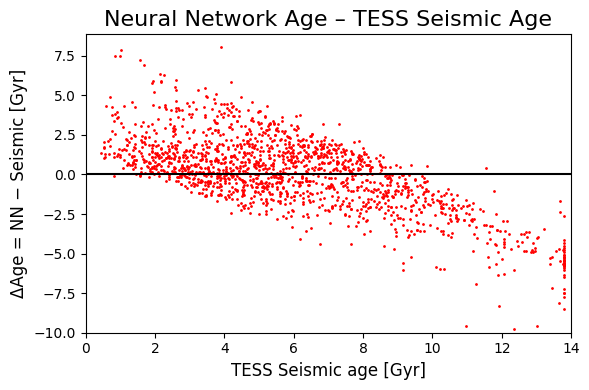

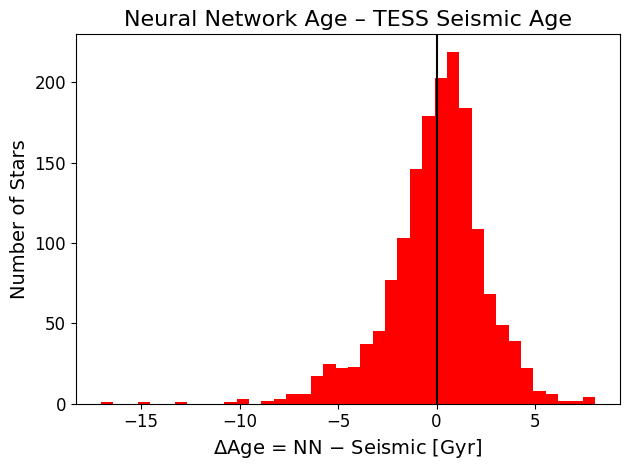

In [ ]:
# difference between TESS and NN predicted ages
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14  # font size for plot titles
plt.rcParams['axes.labelsize'] = 12  # font size for x and y axis labels
plt.rcParams['xtick.labelsize'] = 10 # font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10 # font size for legend

pred_test = model.predict(x_test)

age_true = (y_test * scaling_y).ravel()
age_pred = (pred_test * scaling_y).ravel()

delta_age = age_pred - age_true

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    age_true,
    delta_age,
    s=1.0,
    color='red'
)

ax.axhline(0.0, color='k', linestyle='-', linewidth=1.5)
plt.title('Neural Network Age – TESS Seismic Age', fontsize=16)
ax.set_xlabel('TESS Seismic age [Gyr]')
ax.set_ylabel('ΔAge = NN − Seismic [Gyr]')

ax.set_xlim(0, 14)
ax.set_ylim(-10, delta_age.max()*1.1)

fig.tight_layout()
plt.show()

plt.hist(delta_age, bins=40, color='red')

plt.axvline(0.0, color='k', linewidth=1.5)
plt.title('Neural Network Age – TESS Seismic Age', fontsize=16)
plt.xlabel(r'$\Delta$Age = NN $-$ Seismic [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
agedata2= apokasc2
intersect2, ind_a2, ind_b2 = np.intersect1d(data_masked['sdss4_apogee_id'],agedata2['2MASS'], return_indices=True)
fullx2 = np.dstack([data_masked['teff'][ind_a2],data_masked['logg'][ind_a2], data_masked['m_h_atm'][ind_a2],
                   data_masked['alpha_m_atm'][ind_a2], data_masked['c_h'][ind_a2], data_masked['n_h'][ind_a2]])[0]

fully2 = np.dstack([agedata2['Age'][ind_b2]])[0] #for Pinsonneault 2018

#remove non-finite entries!
mask2 = np.all(np.isfinite(fullx2), axis=1) & np.all(np.isfinite(fully2), axis=1)
fullx2, fully2 = fullx2[mask2], fully2[mask2]

scaling_x2 = np.median(fullx2, axis=0)
scaling_y2 = np.median(fully2, axis=0)

fullx2, fully2 = fullx2/scaling_x2, fully2/scaling_y2
inputs2 = keras.Input(shape=(6,))
#now we add the Dense layers (indicating the previous layer in the brackets following the layer declaration

#change this part if you're changing the number of layers
layer1_2 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs2)
layer2_2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1_2)
layer3_2 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2_2)

#then the output layer YOU ALSO HAVE TO MAKE THIS MATCH YOUR NUMBER OF LAYERS
outputs2 = keras.layers.Dense(1)(layer3_2)


# then we put that all together in the Model object
model2 = keras.Model(inputs=inputs2, outputs=outputs2, name='test')
#and we can print a summary to check it all went to plan
model2.summary()

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
tenpercent2=len(agedata2['Age'][ind_b2])//10 #figure out what ten percent of this set of age data is

trainbin2=slice(tenpercent2+1,-1)
testing2=slice(0,tenpercent2)

x_train2, y_train2 = fullx2[trainbin2], fully2[trainbin2]
x_test2, y_test2 = fullx2[testing2], fully2[testing2]

In [ ]:
model2.fit(x_train2, y_train2, epochs=iterations, validation_split=0.05, batch_size=300)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 4.6075e-04 - loss: 2.9900 - val_accuracy: 0.0000e+00 - val_loss: 0.9700
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0016 - loss: 0.8863 - val_accuracy: 0.0000e+00 - val_loss: 0.5845
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0012 - loss: 0.5989 - val_accuracy: 0.0000e+00 - val_loss: 0.4550
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0018 - loss: 0.5488 - val_accuracy: 0.0000e+00 - val_loss: 0.4135
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0015 - loss: 0.4872 - val_accuracy: 0.0000e+00 - val_loss: 0.3830
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0020 - loss: 0.4385 - val_accuracy: 0.0000e+00 - val_loss: 0.3660
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0010 - loss: 0.4066 - val_accuracy: 0.0000e+00 - val_loss: 0.3559
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0010 - loss: 

In [ ]:
predictions2 = model2.predict(x_test2)
print(len(predictions2))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
652


In [ ]:
DR19x2 = np.dstack([data_masked['teff'],data_masked['logg'], data_masked['m_h_atm'],
                   data_masked['alpha_m_atm'], data_masked['c_h'], data_masked['n_h']])[0]
print(len(data_masked['teff']))

DR19x2= DR19x2/scaling_x2
predictionsDR192 = model2.predict(DR19x2)

963539
30111/30111 ━━━━━━━━━━━━━━━━━━━━ 45s 1ms/step


In [ ]:
teff_train2 = data_masked['teff'][ind_a2]

teff_train_finite2 = teff_train2[np.isfinite(teff_train2)]

teff_min2, teff_max2 = np.percentile(teff_train_finite2, [1, 99])
print("Training Teff range (1–99th percentile):", teff_min2, teff_max2)

teff_all2 = data_masked['teff']
good2 = np.where(np.isfinite(teff_all2) & (teff_all2 > teff_min2) & (teff_all2 < teff_max2))[0]

print("Total DR19 stars:", len(teff_all2))
print("Good (Teff-cut) sample size:", len(good2))

DR19x_good2 = np.dstack([data_masked['teff'][good2],data_masked['logg'][good2],data_masked['m_h_atm'][good2],data_masked['alpha_m_atm'][good2],
            data_masked['c_h'][good2], data_masked['n_h'][good2]])[0]

DR19x_good2 = DR19x_good2 / scaling_x2
predictionsDR19_good2 = model.predict(DR19x_good2)

inside2 = (np.isfinite(teff_train2) & (teff_train2 > teff_min2) & (teff_train2 < teff_max2))
print("Fraction of training stars kept:", inside2.mean())

Training Teff range (1–99th percentile): 3921.88978515625 5011.58044921875
Total DR19 stars: 963539
Good (Teff-cut) sample size: 491810
15370/15370 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step
Fraction of training stars kept: 0.979776313773556


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


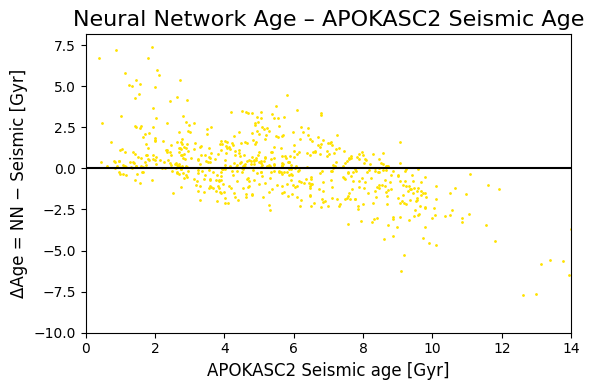

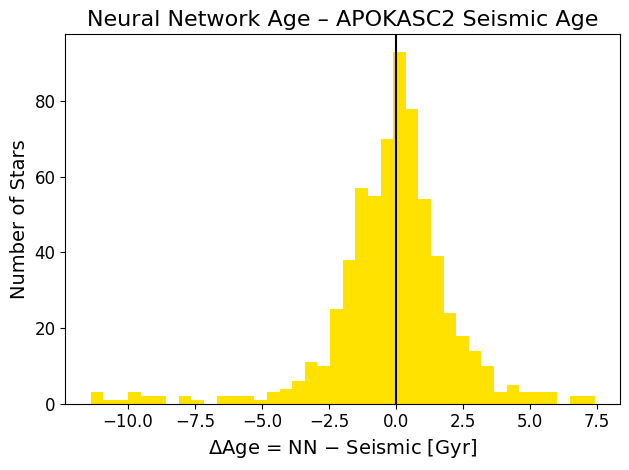

In [ ]:
# difference between APOKASC2 and NN predicted ages
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14  # font size for plot titles
plt.rcParams['axes.labelsize'] = 12  # font size for x and y axis labels
plt.rcParams['xtick.labelsize'] = 10 # font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10 # font size for legend

pred_test2 = model2.predict(x_test2)

age_true2 = (y_test2 * scaling_y2).ravel()
age_pred2 = (pred_test2 * scaling_y2).ravel()

delta_age2 = age_pred2 - age_true2

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    age_true2,
    delta_age2,
    s=1.0,
    color='#FFE200'
)

ax.axhline(0.0, color='k', linestyle='-', linewidth=1.5)
plt.title('Neural Network Age – APOKASC2 Seismic Age', fontsize=16)
ax.set_xlabel('APOKASC2 Seismic age [Gyr]')
ax.set_ylabel('ΔAge = NN − Seismic [Gyr]')

ax.set_xlim(0, 14)
ax.set_ylim(-10, delta_age2.max()*1.1)

fig.tight_layout()
plt.show()

plt.hist(delta_age2, bins=40, color='#FFE200')

plt.axvline(0.0, color='k', linewidth=1.5)
plt.title('Neural Network Age – APOKASC2 Seismic Age', fontsize=16)
plt.xlabel(r'$\Delta$Age = NN $-$ Seismic [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
agedata3= apokasc3
intersect3, ind_a3, ind_b3 = np.intersect1d(data_masked['gaia_dr3_source_id'],agedata3['GaiaDR3'], return_indices=True)
fullx3 = np.dstack([data_masked['teff'][ind_a3],data_masked['logg'][ind_a3], data_masked['m_h_atm'][ind_a3],
                   data_masked['alpha_m_atm'][ind_a3], data_masked['c_h'][ind_a3], data_masked['n_h'][ind_a3]])[0]

fully3 = np.dstack([agedata3['Age'][ind_b3]])[0] #for Pinsonneault 2018

#remove non-finite entries!
mask3 = np.all(np.isfinite(fullx3), axis=1) & np.all(np.isfinite(fully3), axis=1)
fullx3, fully3 = fullx3[mask3], fully3[mask3]

scaling_x3 = np.median(fullx3, axis=0)
scaling_y3 = np.median(fully3, axis=0)

fullx3, fully3 = fullx3/scaling_x3, fully3/scaling_y3
inputs3 = keras.Input(shape=(6,))
#now we add the Dense layers (indicating the previous layer in the brackets following the layer declaration

#change this part if you're changing the number of layers
layer1_3 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs3)
layer2_3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1_3)
layer3_3 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2_3)

#then the output layer YOU ALSO HAVE TO MAKE THIS MATCH YOUR NUMBER OF LAYERS
outputs3 = keras.layers.Dense(1)(layer3_3)


# then we put that all together in the Model object
model3 = keras.Model(inputs=inputs3, outputs=outputs3, name='test')
#and we can print a summary to check it all went to plan
model3.summary()

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
tenpercent3=len(agedata3['Age'][ind_b3])//10 #figure out what ten percent of this set of age data is

trainbin3=slice(tenpercent3+1,-1)
testing3=slice(0,tenpercent3)

x_train3, y_train3 = fullx3[trainbin3], fully3[trainbin3]
x_test3, y_test3 = fullx3[testing3], fully3[testing3]

In [ ]:
model3.fit(x_train3, y_train3, epochs=iterations, validation_split=0.05, batch_size=300)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0000e+00 - loss: 1.7931 - val_accuracy: 0.0000e+00 - val_loss: 0.7147
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.9985 - val_accuracy: 0.0000e+00 - val_loss: 0.5520
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.8897 - val_accuracy: 0.0000e+00 - val_loss: 0.4893
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.8388 - val_accuracy: 0.0000e+00 - val_loss: 0.4549
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.7299 - val_accuracy: 0.0000e+00 - val_loss: 0.4282
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.7253 - val_accuracy: 0.0000e+00 - val_loss: 0.4079
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.6810 - val_accuracy: 0.0000e+00 - val_loss: 0.3947
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - a

In [ ]:
predictions3 = model3.predict(x_test3)
print(len(predictions3))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1190


In [ ]:
DR19x3 = np.dstack([data_masked['teff'],data_masked['logg'], data_masked['m_h_atm'],
                   data_masked['alpha_m_atm'], data_masked['c_h'], data_masked['n_h']])[0]
print(len(data_masked['teff']))

DR19x3= DR19x3/scaling_x3
predictionsDR193 = model3.predict(DR19x3)

963539
30111/30111 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step


In [ ]:
teff_train3 = data_masked['teff'][ind_a3]

teff_train_finite3 = teff_train3[np.isfinite(teff_train3)]

teff_min3, teff_max3 = np.percentile(teff_train_finite3, [1, 99])
print("Training Teff range (1–99th percentile):", teff_min3, teff_max3)

teff_all3 = data_masked['teff']
good3 = np.where(np.isfinite(teff_all3) & (teff_all3 > teff_min3) & (teff_all3 < teff_max3))[0]

print("Total DR19 stars:", len(teff_all3))
print("Good (Teff-cut) sample size:", len(good3))

DR19x_good3 = np.dstack([data_masked['teff'][good3],data_masked['logg'][good3],data_masked['m_h_atm'][good3],data_masked['alpha_m_atm'][good3],
            data_masked['c_h'][good3], data_masked['n_h'][good3]])[0]

DR19x_good3 = DR19x_good3 / scaling_x3
predictionsDR19_good3 = model.predict(DR19x_good3)

inside3 = (np.isfinite(teff_train3) & (teff_train3 > teff_min3) & (teff_train3 < teff_max3))
print("Fraction of training stars kept:", inside3.mean())

Training Teff range (1–99th percentile): 3736.781240234375 5025.031079101563
Total DR19 stars: 963539
Good (Teff-cut) sample size: 543902
16997/16997 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
Fraction of training stars kept: 0.9769082206734403


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


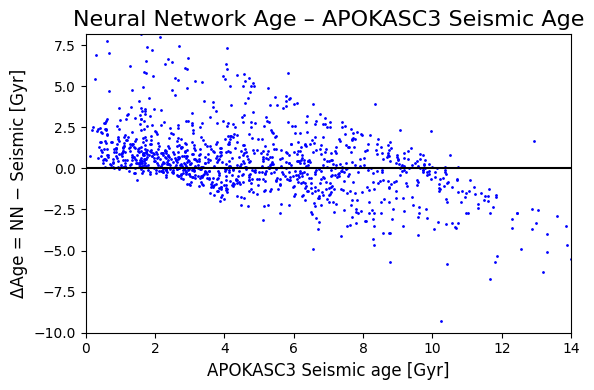

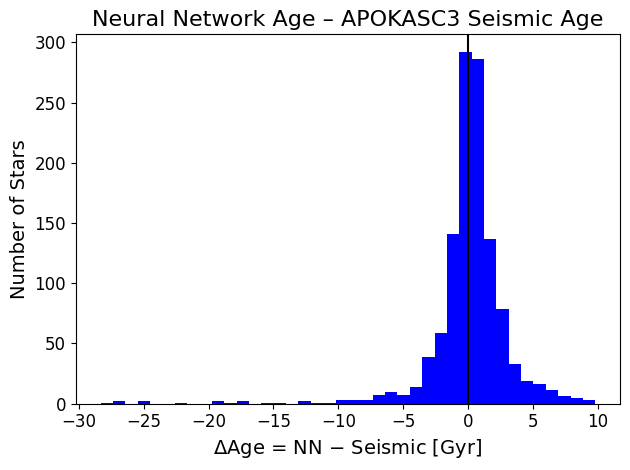

In [ ]:
# difference between APOKASC3 and NN predicted ages
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14  # font size for plot titles
plt.rcParams['axes.labelsize'] = 12  # font size for x and y axis labels
plt.rcParams['xtick.labelsize'] = 10 # font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10 # font size for legend

pred_test3 = model3.predict(x_test3)

age_true3 = (y_test3 * scaling_y3).ravel()
age_pred3 = (pred_test3 * scaling_y3).ravel()

delta_age3 = age_pred3 - age_true3

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    age_true3,
    delta_age3,
    s=1.0,
    color='blue'
)

ax.axhline(0.0, color='k', linestyle='-', linewidth=1.5)
plt.title('Neural Network Age – APOKASC3 Seismic Age', fontsize=16)
ax.set_xlabel('APOKASC3 Seismic age [Gyr]')
ax.set_ylabel('ΔAge = NN − Seismic [Gyr]')

ax.set_xlim(0, 14)
ax.set_ylim(-10, delta_age2.max()*1.1)

fig.tight_layout()
plt.show()

plt.hist(delta_age3, bins=40, color='blue')

plt.axvline(0.0, color='k', linewidth=1.5)
plt.title('Neural Network Age – APOKASC3 Seismic Age', fontsize=16)
plt.xlabel(r'$\Delta$Age = NN $-$ Seismic [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
agedata4= apok2
intersect4, ind_a4, ind_b4 = np.intersect1d(data_masked['sdss4_apogee_id'],agedata4['APOGEE'], return_indices=True)
fullx4 = np.dstack([data_masked['teff'][ind_a4],data_masked['logg'][ind_a4], data_masked['m_h_atm'][ind_a4],
                   data_masked['alpha_m_atm'][ind_a4], data_masked['c_h'][ind_a4], data_masked['n_h'][ind_a4]])[0]

fully4 = np.dstack([agedata4['Age'][ind_b4]])[0] #for Pinsonneault 2018

#remove non-finite entries!
mask4 = np.all(np.isfinite(fullx4), axis=1) & np.all(np.isfinite(fully4), axis=1)
fullx4, fully4 = fullx4[mask4], fully4[mask4]

scaling_x4 = np.median(fullx4, axis=0)
scaling_y4 = np.median(fully4, axis=0)

fullx4, fully4 = fullx4/scaling_x4, fully4/scaling_y4
inputs4 = keras.Input(shape=(6,))
#now we add the Dense layers (indicating the previous layer in the brackets following the layer declaration

#change this part if you're changing the number of layers
layer1_4 =keras.layers.Dense(neurons_per_layer, activation='relu')(inputs4)
layer2_4 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer1_4)
layer3_4 = keras.layers.Dense(neurons_per_layer, activation='relu')(layer2_4)

#then the output layer YOU ALSO HAVE TO MAKE THIS MATCH YOUR NUMBER OF LAYERS
outputs4 = keras.layers.Dense(1)(layer3_4)


# then we put that all together in the Model object
model4 = keras.Model(inputs=inputs4, outputs=outputs4, name='test')
#and we can print a summary to check it all went to plan
model4.summary()

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
tenpercent4=len(agedata4['Age'][ind_b4])//10 #figure out what ten percent of this set of age data is

trainbin4=slice(tenpercent4+1,-1)
testing4=slice(0,tenpercent4)

x_train4, y_train4 = fullx4[trainbin4], fully4[trainbin4]
x_test4, y_test4 = fullx4[testing4], fully4[testing4]

In [ ]:
model4.fit(x_train4, y_train4, epochs=iterations, validation_split=0.05, batch_size=300)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0000e+00 - loss: 2.4547 - val_accuracy: 0.0000e+00 - val_loss: 2.1890
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 1.9966 - val_accuracy: 0.0000e+00 - val_loss: 1.8528
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 1.7976 - val_accuracy: 0.0000e+00 - val_loss: 1.6248
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1.5268 - val_accuracy: 0.0060 - val_loss: 1.4407
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 8.7664e-04 - loss: 1.3654 - val_accuracy: 0.0120 - val_loss: 1.2713
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0011 - loss: 1.2767 - val_accuracy: 0.0120 - val_loss: 1.1145
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0022 - loss: 1.1328 - val_accuracy: 0.0120 - val_loss: 0.9709
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0051 - l

In [ ]:
predictions4 = model4.predict(x_test4)
print(len(predictions4))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
377


In [ ]:
DR19x4 = np.dstack([data_masked['teff'],data_masked['logg'], data_masked['m_h_atm'],
                   data_masked['alpha_m_atm'], data_masked['c_h'], data_masked['n_h']])[0]
print(len(data_masked['teff']))

DR19x4= DR19x4/scaling_x4
predictionsDR194 = model4.predict(DR19x4)

963539
30111/30111 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step


In [ ]:
teff_train4 = data_masked['teff'][ind_a4]

teff_train_finite4 = teff_train4[np.isfinite(teff_train4)]

teff_min4, teff_max4 = np.percentile(teff_train_finite4, [1, 99])
print("Training Teff range (1–99th percentile):", teff_min4, teff_max4)

teff_all4 = data_masked['teff']
good4 = np.where(np.isfinite(teff_all4) & (teff_all4 > teff_min4) & (teff_all4 < teff_max4))[0]

print("Total DR19 stars:", len(teff_all4))
print("Good (Teff-cut) sample size:", len(good4))

DR19x_good4 = np.dstack([data_masked['teff'][good4],data_masked['logg'][good4],data_masked['m_h_atm'][good4],data_masked['alpha_m_atm'][good4],
            data_masked['c_h'][good4], data_masked['n_h'][good4]])[0]

DR19x_good4 = DR19x_good4 / scaling_x4
predictionsDR19_good4 = model.predict(DR19x_good4)

inside4 = (np.isfinite(teff_train4) & (teff_train4 > teff_min4) & (teff_train4 < teff_max4))
print("Fraction of training stars kept:", inside4.mean())

Training Teff range (1–99th percentile): 4172.7784423828125 4985.5035400390625
Total DR19 stars: 963539
Good (Teff-cut) sample size: 414507
12954/12954 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step
Fraction of training stars kept: 0.9793541556379036


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


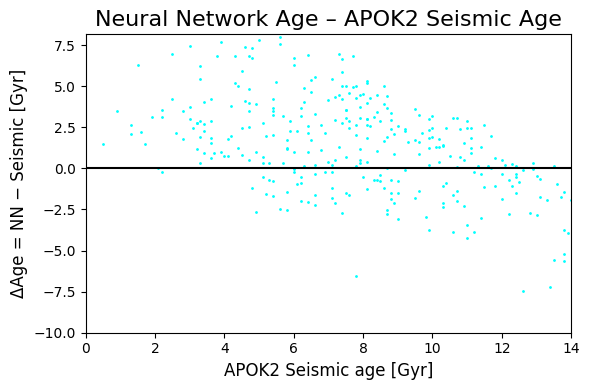

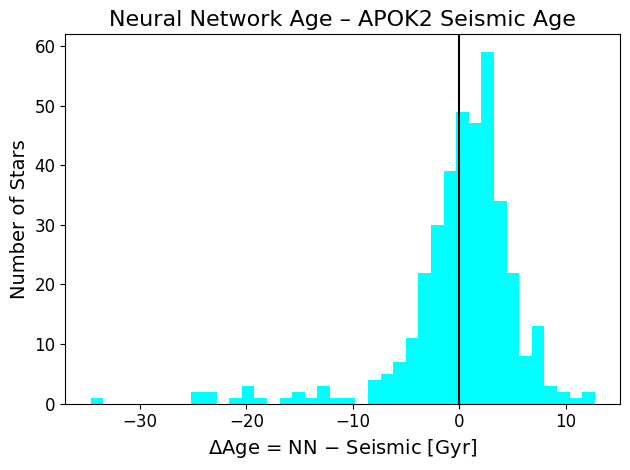

In [ ]:
# difference between APOK2 and NN predicted ages
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14  # font size for plot titles
plt.rcParams['axes.labelsize'] = 12  # font size for x and y axis labels
plt.rcParams['xtick.labelsize'] = 10 # font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10 # font size for y-axis tick labels
plt.rcParams['legend.fontsize'] = 10 # font size for legend

pred_test4 = model4.predict(x_test4)

age_true4 = (y_test4 * scaling_y4).ravel()
age_pred4 = (pred_test4 * scaling_y4).ravel()

delta_age4 = age_pred4 - age_true4

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    age_true4,
    delta_age4,
    s=1.0,
    color='cyan'
)

ax.axhline(0.0, color='k', linestyle='-', linewidth=1.5)
plt.title('Neural Network Age – APOK2 Seismic Age', fontsize=16)
ax.set_xlabel('APOK2 Seismic age [Gyr]')
ax.set_ylabel('ΔAge = NN − Seismic [Gyr]')

ax.set_xlim(0, 14)
ax.set_ylim(-10, delta_age2.max()*1.1)

fig.tight_layout()
plt.show()

plt.hist(delta_age4, bins=40, color='cyan')

plt.axvline(0.0, color='k', linewidth=1.5)
plt.title('Neural Network Age – APOK2 Seismic Age', fontsize=16)
plt.xlabel(r'$\Delta$Age = NN $-$ Seismic [Gyr]', fontsize=14)
plt.ylabel('Number of Stars', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()